# 一、深度学习基础知识
## 1，CNN-DSSM

### DSSM
- 计算Query和Doc的语义相似度
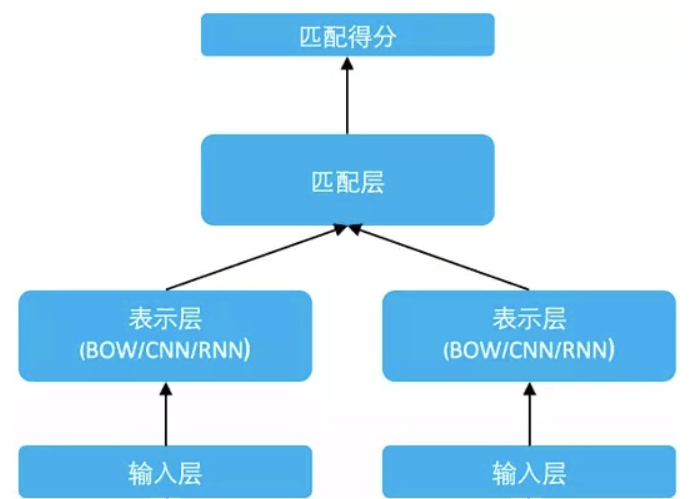

- 网络结构
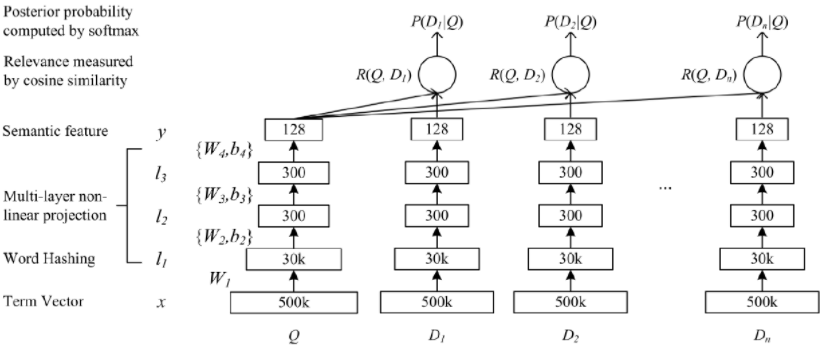
- 优点：DSSM 用字向量作为输入既可以减少切词的依赖，又可以提高模型的范化能力，因为每个汉字所能表达的语义是可以复用的。另一方面，传统的输入层是用 Embedding 的方式（如 Word2Vec 的词向量）或者主题模型的方式（如 LDA 的主题向量）来直接做词的映射，再把各个词的向量累加或者拼接起来，由于 Word2Vec 和 LDA 都是无监督的训练，这样会给整个模型引入误差，DSSM 采用统一的有监督训练，不需要在中间过程做无监督模型的映射，因此精准度会比较高。
- 缺点：丧失了语序信息和上下文信息。另一方面，DSSM 采用弱监督、端到端的模型，预测结果不可控。

### CNN-DSSM
- 输入层
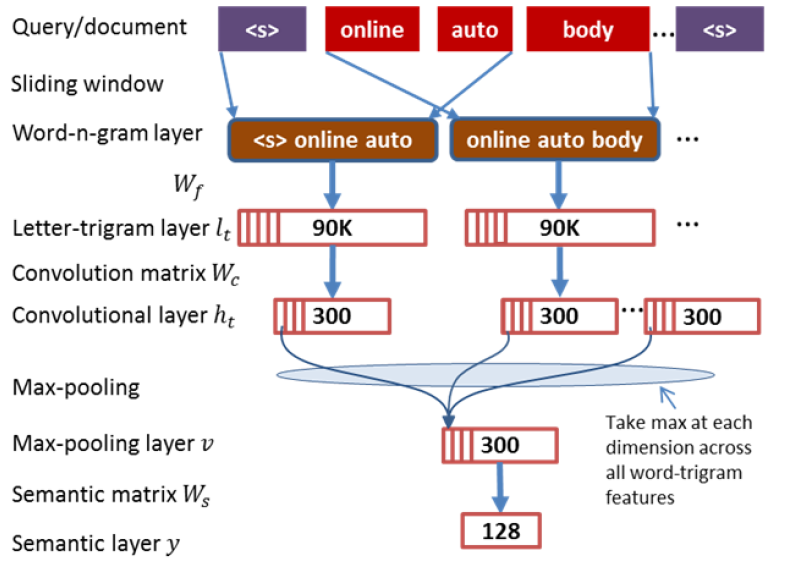

- 表示层
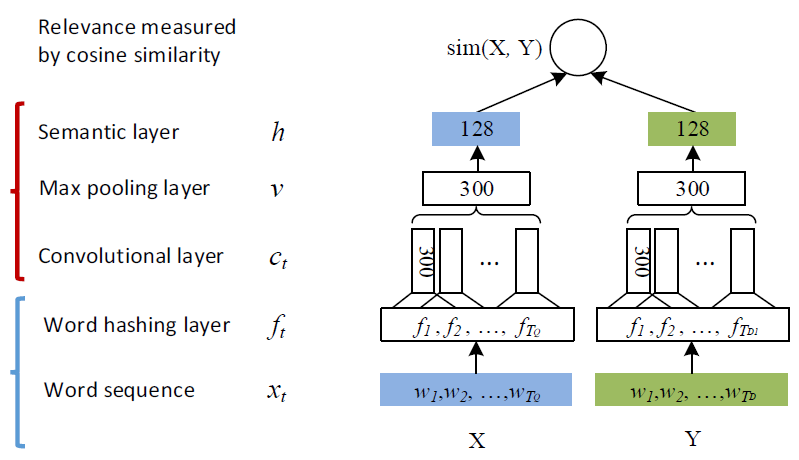

- 卷积层
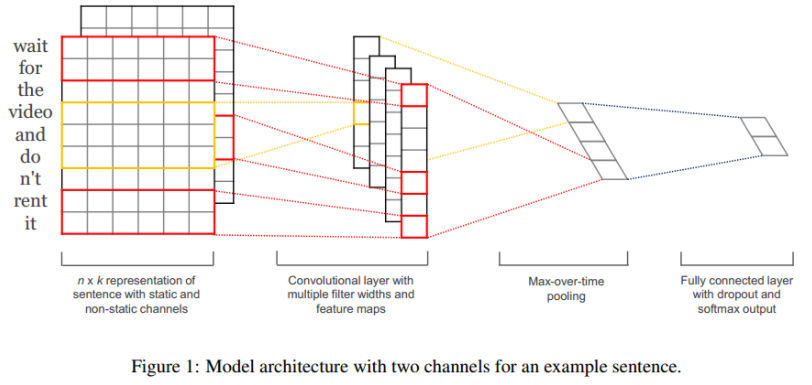

- 优点:CNN-DSSM 通过卷积层提取了滑动窗口下的上下文信息，又通过池化层提取了全局的上下文信息，上下文信息得到较为有效的保留。
- 缺点：对于间隔较远的上下文信息，难以有效保留。 举个例子，I grew up in France... I speak fluent French，显然 France 和 French 是具有上下文依赖关系的，但是由于 CNN-DSSM 滑动窗口（卷积核）大小的限制，导致无法捕获该上下文信息。

## 2，LSTM-DSSM
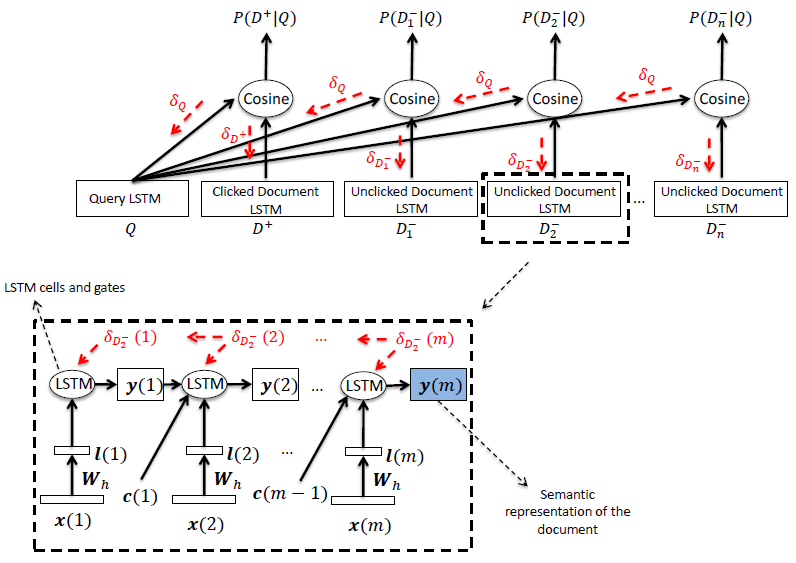

## 3，MMoE
### Motivation
- 多任务模型通过学习不同任务的联系和差异，可提高每个任务的学习效率和质量。多任务学习的的框架广泛采用shared-bottom的结构，不同任务间共用底部的隐层。这种结构本质上可以减少过拟合的风险，但是效果上可能受到任务差异和数据分布带来的影响。也有一些其他结构，比如两个任务的参数不共用，但是通过对不同任务的参数增加L2范数的限制；也有一些对每个任务分别学习一套隐层然后学习所有隐层的组合。和shared-bottom结构相比，这些模型对增加了针对任务的特定参数，在任务差异会影响公共参数的情况下对最终效果有提升。缺点就是模型增加了参数量所以需要更大的数据量来训练模型，而且模型更复杂并不利于在真实生产环境中实际部署使用。因此，论文《Modeling Task Relationships in Multi-task Learning with Multi-gate Mixture-of-Experts》中提出了一个Multi-gate Mixture-of-Experts(MMoE)的多任务学习结构。MMoE模型刻画了任务相关性，基于共享表示来学习特定任务的函数，避免了明显增加参数的缺点。

### 网络结构
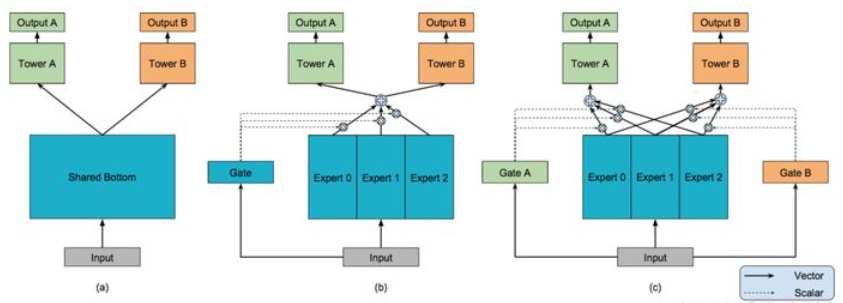

## 4，ShareBottom多任务学习
### 概念
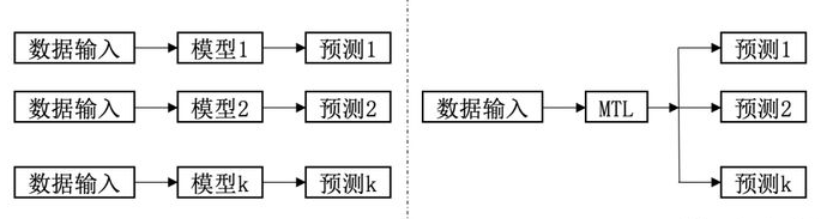
- 多任务学习（multi task learning）：简单来说有多个目标函数loss同时学习的就算多任务学习。

### 基本框架
#### hard parameter sharing
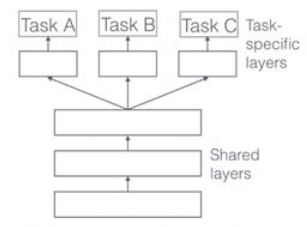
- 无论最后有多少个任务，底层参数统一共享，顶层参数各个模型各自独立。由于对于大部分参数进行了共享，模型的过拟合概率会降低，共享的参数越多，过拟合几率越小，共享的参数越少，越趋近于单个任务学习分别学习。

#### soft parameter sharing
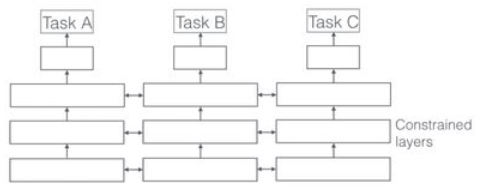
- 底层共享一部分参数，自己还有独特的一部分参数不共享，顶层有自己的参数。

## 5，YouTube深度学习视频推荐系统
### 算法架构
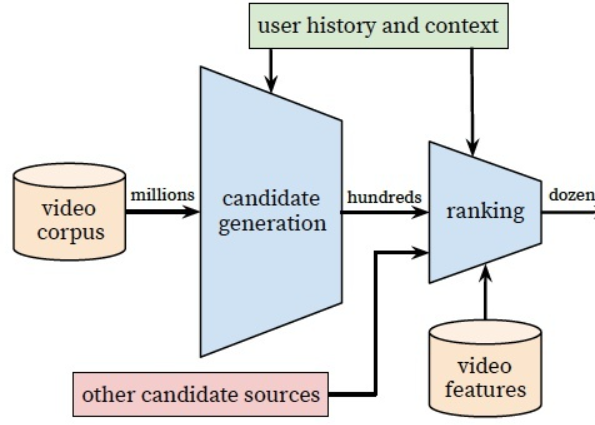

### Candidate Generation Model
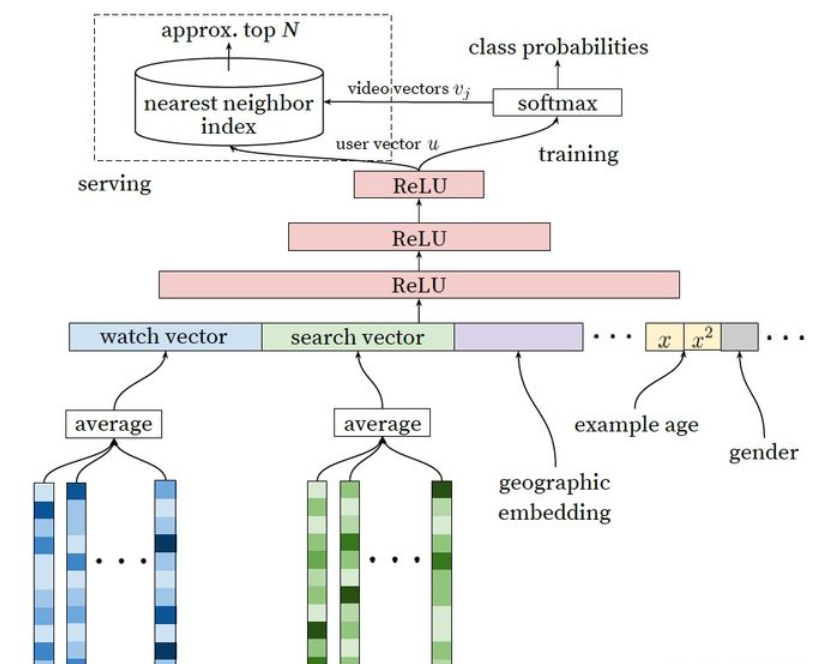
- 完成候选视频的快速筛选，这一步候选视频集合由百万降低到了百的量级。

### Ranking Model
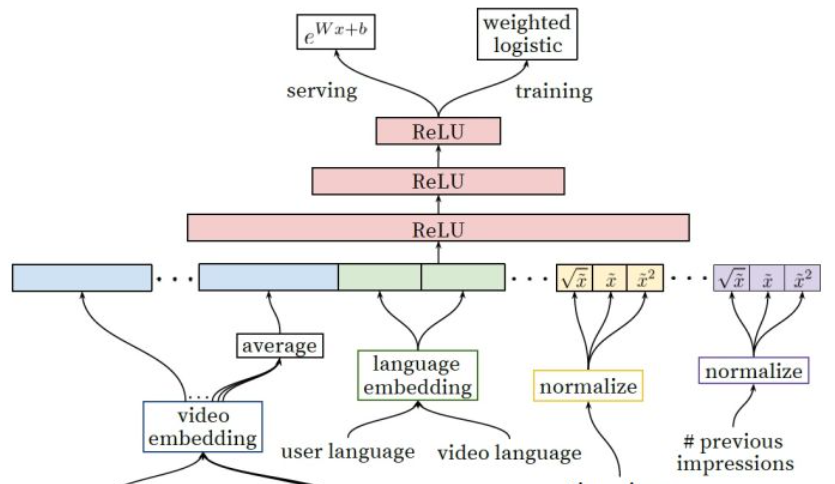
- 完成几百个候选视频的精排

# 二，代码实践
- 广告推荐领域的“点击率预估模型”案例：
- 可选网络结构：DNN,DeepFM,wide&deep

## 背景介绍
- 点击率预估模型预判用户对一条广告点击的概率，对每次广告的点击情况做出预测，是广告技术的核心算法之一。逻谛斯克回归对大规模稀疏特征有着很好的学习能力，在点击率预估任务发展的早期一统天下。近年来，DNN 模型由于其强大的学习能力逐渐接过点击率预估任务的大旗。在点击率预估任务中，我们给出谷歌提出的 Wide & Deep 模型。这一模型融合了适用于学习抽象特征的DNN和适用于大规模稀疏特征的逻谛斯克回归两者的优点，可以作为一种相对成熟的模型框架使用，在工业界也有一定的应用。
- CTR(Click-Through Rate，点击率预估)是对用户点击一个特定链接的概率做出预测，是广告投放过程中的一个重要环节。精准的点击率预估对在线广告系统收益最大化具有重要意义。
- 当有多个广告位时，CTR 预估一般会作为排序的基准，比如在搜索引擎的广告系统里，当用户输入一个带商业价值的搜索词（query）时，系统大体上会执行下列步骤来展示广告：
1.获取与用户搜索词相关的广告集合

2.业务规则和相关性过滤

3.根据拍卖机制和 CTR 排序

4.展出广告
### 发展阶段
在业内，CTR 模型经历了如下的发展阶段：

1.Logistic Regression(LR) / GBDT + 特征工程

2.LR + DNN 特征

3.DNN + 特征工程

在发展早期时 LR 一统天下，但最近 DNN 模型由于其强大的学习能力和逐渐成熟的性能优化， 逐渐地接过 CTR 预估任务的大旗。
### LR&DNN
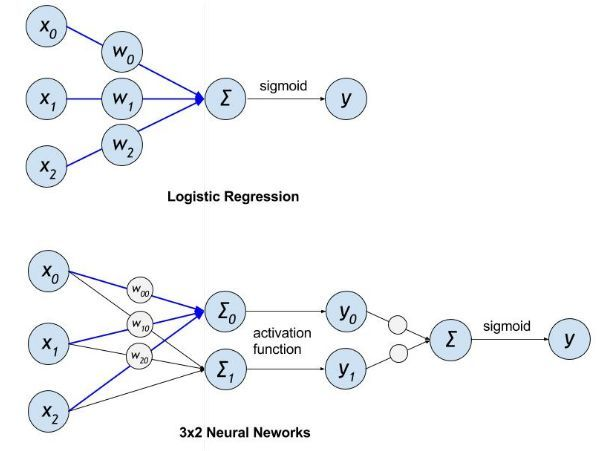
- LR 的蓝色箭头部分可以直接类比到 DNN 中对应的结构，可以看到 LR 和 DNN 有一些共通之处（比如权重累加）， 但前者的模型复杂度在相同输入维度下比后者可能低很多（从某方面讲，模型越复杂，越有潜力学习到更复杂的信息）； 如果 LR 要达到匹敌 DNN 的学习能力，必须增加输入的维度，也就是增加特征的数量， 这也就是为何 LR 和大规模的特征工程必须绑定在一起的原因。
- LR 对于 DNN 模型的优势是对大规模稀疏特征的容纳能力，包括内存和计算量等方面，工业界都有非常成熟的优化方法； 而 DNN 模型具有自己学习新特征的能力，一定程度上能够提升特征使用的效率， 这使得 DNN 模型在同样规模特征的情况下，更有可能达到更好的学习效果。

## Wide&Deep
- 谷歌在 16 年提出了 Wide & Deep Learning 的模型框架，用于融合适合学习抽象特征的 DNN 和 适用于大规模稀疏特征的 LR 两种模型的优点。

### 模型简介
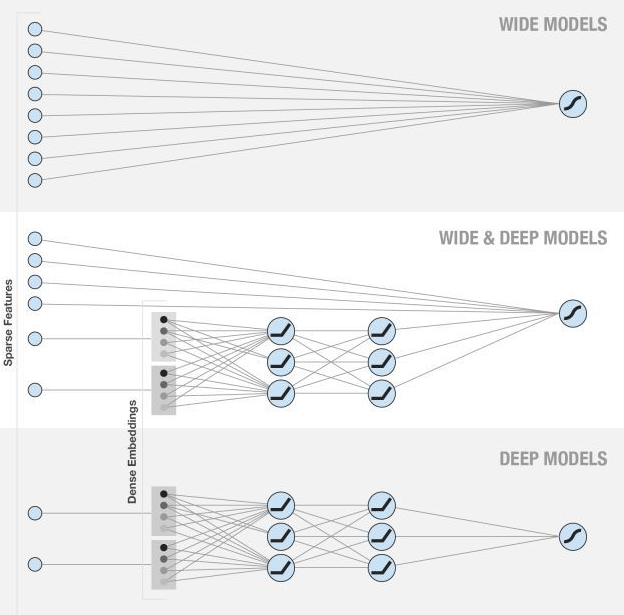

### 数据说明
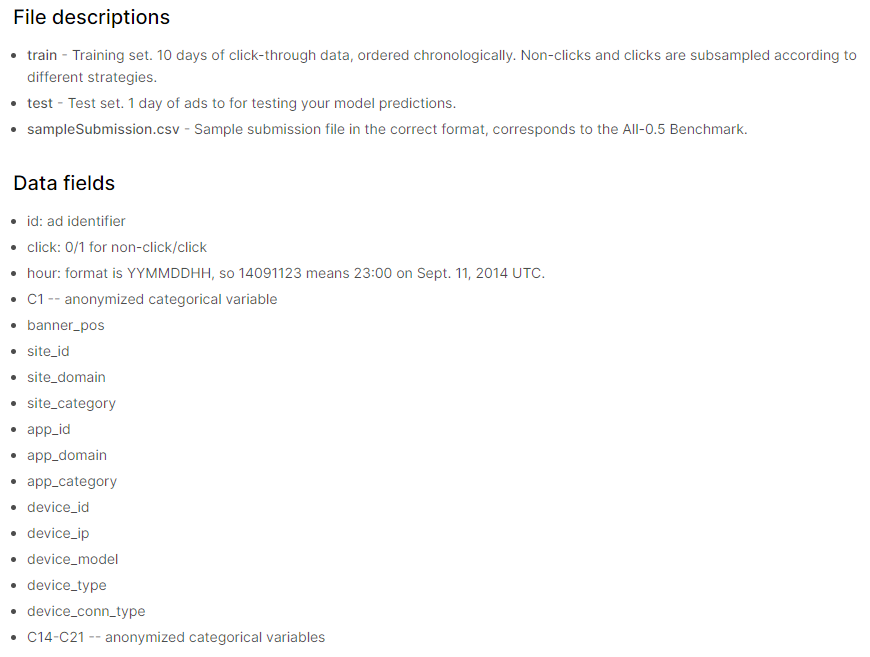
Kaggle CTR 链接：https://www.kaggle.com/c/avazu-ctr-prediction/data

### 输入

In [ ]:
import paddle
import paddle.fluid as fluid
import six
import numpy
import math

In [ ]:
# 输入
# 模型只接受 3 个输入，分别是

# dnn_input ，也就是 Deep 部分的输入
# lr_input ，也就是 Wide 部分的输入
# click ， 点击与否，作为二分类模型学习的标签
dnn_merged_input = layer.data(
    name='dnn_input',
    type=paddle.data_type.sparse_binary_vector(data_meta_info['dnn_input']))

lr_merged_input = layer.data(
    name='lr_input',
    type=paddle.data_type.sparse_binary_vector(data_meta_info['lr_input']))

click = paddle.layer.data(name='click', type=dtype.dense_vector(1))

### Wide部分
- 直接使用了 LR 模型，但激活函数改成了 RELU 来加速

In [ ]:
def build_lr_submodel():
    fc = layer.fc(input=lr_merged_input, size=1, name='lr', act=paddle.activation.Relu())
    return fc

### Deep部分

In [ ]:
def build_dnn_submodel(dnn_layer_dims):
    dnn_embedding = layer.fc(input=dnn_merged_input, size=dnn_layer_dims[0])
    _input_layer = dnn_embedding
    for i, dim in enumerate(dnn_layer_dims[1:]):
        fc = layer.fc(input=_input_layer,size=dim,act=paddle.activation.Relu(),name='dnn-fc-%d' % i)
        _input_layer = fc
    return _input_layer

### 融合
- 两个 submodel 的最上层输出加权求和得到整个模型的输出，输出部分使用 sigmoid 作为激活函数，得到区间 (0,1) 的预测值， 来逼近训练数据中二元类别的分布，并最终作为 CTR 预估的值使用。

In [ ]:
# conbine DNN and LR submodels

def combine_submodels(dnn, lr):
    merge_layer = layer.concat(input=[dnn, lr])
    fc = layer.fc(input=merge_layer,size=1, name='output',act=paddle.activation.Sigmoid())
    # use sigmoid function to approximate ctr, wihch is a float value between 0 and 1.
    return fc

### 训练

In [ ]:
dnn = build_dnn_submodel(dnn_layer_dims)
lr = build_lr_submodel()
output = combine_submodels(dnn, lr)
# cost and train period
classification_cost = paddle.layer.multi_binary_label_cross_entropy_cost(input=output, label=click)
paddle.init(use_gpu=False, trainer_count=11)
params = paddle.parameters.create(classification_cost)
optimizer = paddle.optimizer.Momentum(momentum=0)
trainer = paddle.trainer.SGD(cost=classification_cost, parameters=params, update_equation=optimizer)
dataset = AvazuDataset(train_data_path, n_records_as_test=test_set_size)
def event_handler(event):
    if isinstance(event, paddle.event.EndIteration):
        if event.batch_id % 100 == 0:
            logging.warning("Pass %d, Samples %d, Cost %f" % (event.pass_id, event.batch_id * batch_size, event.cost))
        if event.batch_id % 1000 == 0:
            result = trainer.test(reader=paddle.batch(dataset.test, batch_size=1000),feeding=field_index)
            logging.warning("Test %d-%d, Cost %f" % (event.pass_id, event.batch_id,result.cost))

trainer.train(reader=paddle.batch(paddle.reader.shuffle(dataset.train, buf_size=500),batch_size=batch_size),feeding=field_index,event_handler=event_handler,num_passes=100)